In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
pneumonia_data = pd.read_csv("C:/Users/coryg/OneDrive/Desktop/STAT_574_Data_Mining/pneumonia_data.csv")
code_gender = {'M':1, 'F':0}
code_tobacco = {'yes':1, 'no':0}
code_pneumonia = {'yes':1, 'no':0}

pneumonia_data['gender'] = pneumonia_data['gender'].map(code_gender)
pneumonia_data['tobacco_use'] = pneumonia_data['tobacco_use'].map(code_tobacco)
pneumonia_data['pneumonia'] = pneumonia_data['pneumonia'].map(code_pneumonia)

X = pneumonia_data.iloc[:, 0:4].values 
y = pneumonia_data.iloc[:, 4].values

In [4]:
#Splitting the data into 80% training and 20% testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=786756)

#Fitting binary tree with Gini splitting criterion

gini_tree = DecisionTreeClassifier(max_leaf_nodes=6, criterion='gini', random_state=199233)
gini_tree.fit = gini_tree.fit(X_train, y_train)

In [5]:
#Computing confusion matrices and performance measures for testing set for a range of cutoffs

y_pred = gini_tree.predict_proba(X_test)
total = len(y_pred)

cutoff = []
accuracy = []
misclassrate = []
sensitivity = []
specificity = []
oneminusspec = []
distance = []

for i in range(99):
    tp=0
    fp=0
    tn=0
    fn=0
    cutoff.append(0.01*(i+1))
    for sub1, sub2 in zip(y_pred[::,1], y_test):
        tp_ind=1 if (sub1>0.01*(i+1) and sub2==1) else 0
        fp_ind=1 if (sub1>0.01*(i+1) and sub2==0) else 0
        tn_ind=1 if (sub1<0.01*(i+1) and sub2==0) else 0
        fn_ind=1 if (sub1<0.01*(i+1) and sub2==1) else 0
        tp+=tp_ind
        fp+=fp_ind
        tn+=tn_ind
        fn+=fn_ind
    accuracy_i = (tp+tn)/total
    misclassrate_i = (fp+fn)/total
    sensitivity_i = tp/(tp+fn)
    specificity_i = tn/(fp+tn)
    oneminusspec_i = fp/(fp+tn)
    distance_i = np.sqrt(pow(oneminusspec_i,2)+pow(1-sensitivity_i,2))

    accuracy.append(accuracy_i)
    misclassrate.append(misclassrate_i)
    sensitivity.append(sensitivity_i)
    specificity.append(specificity_i)
    oneminusspec.append(oneminusspec_i)
    distance.append(distance_i)

Text(0, 0.5, 'Sensitivity')

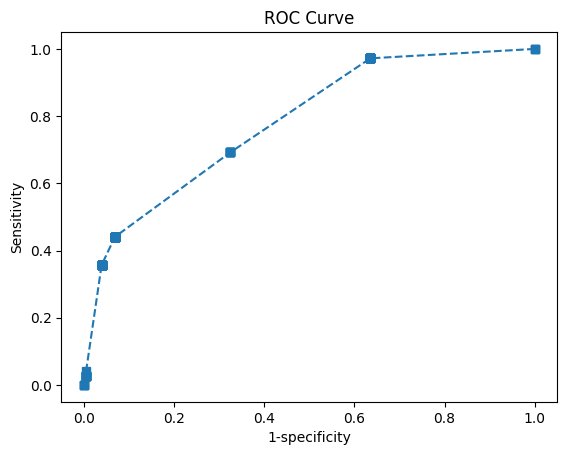

In [6]:
#Plotting ROC Curve

plt.plot(oneminusspec, sensitivity, linestyle='--', marker='s')
plt.title('ROC Curve')
plt.xlabel('1-specificity')
plt.ylabel('Sensitivity')

In [7]:
#Reporting measures for the point on the ROC Curve closest to the ideal point (0,1)

df = pd.DataFrame({'accuracy':accuracy, 'misclassrate':misclassrate, 'sensitivity':sensitivity,
                   'specificity':specificity, 'oneminusspec':oneminusspec, 'distance':distance,
                   'cutoff':cutoff})
min_distance = min(distance)
optimal = df[df['distance'] == min_distance]
print(optimal)

    accuracy  misclassrate  sensitivity  specificity  oneminusspec  distance  \
27  0.682081      0.317919     0.692308     0.674877      0.325123  0.447638   
28  0.682081      0.317919     0.692308     0.674877      0.325123  0.447638   
29  0.682081      0.317919     0.692308     0.674877      0.325123  0.447638   
30  0.682081      0.317919     0.692308     0.674877      0.325123  0.447638   
31  0.682081      0.317919     0.692308     0.674877      0.325123  0.447638   
32  0.682081      0.317919     0.692308     0.674877      0.325123  0.447638   
33  0.682081      0.317919     0.692308     0.674877      0.325123  0.447638   

    cutoff  
27    0.28  
28    0.29  
29    0.30  
30    0.31  
31    0.32  
32    0.33  
33    0.34  


In [10]:
#Computing area under ROC Curve

df = df.sort_values('oneminusspec', ascending=True)
df['lagx'] = df['oneminusspec'].shift(1)
df['lagy'] = df['sensitivity'].shift(1)
df['lagx'] = np.nan_to_num(df['lagx'], nan=0)
df['lagy'] = np.nan_to_num(df['lagy'], nan=0)
df['trapezoid'] = ((df['oneminusspec']-df['lagx'])*(df['sensitivity']+df['lagy']))/2
AUC = sum(df['trapezoid'])
print(AUC)

0.7814776561697745
